In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize']=(6,6)
#plt.rcParams['font.weight']='bold'
#plt.rcParams['axes.labelweight']='bold'
#plt.rcParams['lines.linewidth']=1.5
#plt.rcParams['lines.markeredgewidth']=2
%matplotlib inline
%config InlineBackend.figure_format = "retina"

sys.path.append('/Applications/OpenFUSIONToolkit/python')
from OpenFUSIONToolkit.TokaMaker import TokaMaker
from OpenFUSIONToolkit.TokaMaker.meshing import load_gs_mesh, gs_Domain
from OpenFUSIONToolkit.TokaMaker.util import create_isoflux, read_eqdsk

from omfit_classes.omfit_eqdsk import boundaryShape

In [2]:
lim2 = np.array([[ 1.38295616,  0.        ],
       [ 1.37819627,  0.1136394 ],
       [ 1.36411987,  0.22839392],
       [ 1.34147837,  0.33535708],
       [ 1.31160087,  0.428733  ],
       [ 1.27659351,  0.50348616],
       [ 1.23989537,  0.55532746],
       [ 1.20721657,  0.58207902],
       [ 1.18129551,  0.58932473],
       [ 1.0902428 ,  0.57841675],
       [ 0.99292215,  0.544273  ],
       [ 0.90082552,  0.48851609],
       [ 0.81867131,  0.41333246],
       [ 0.75043826,  0.32194035],
       [ 0.69936479,  0.2185339 ],
       [ 0.66782749,  0.10834806],
       [ 0.65723823,  0.        ],
       [ 0.66782749, -0.10834806],
       [ 0.69936479, -0.2185339 ],
       [ 0.75043826, -0.32194035],
       [ 0.81867131, -0.41333246],
       [ 0.90082552, -0.48851609],
       [ 0.99292215, -0.544273  ],
       [ 1.0902428 , -0.57841675],
       [ 1.18129551, -0.58932473],
       [ 1.20721657, -0.58207902],
       [ 1.23989537, -0.55532746],
       [ 1.27659351, -0.50348616],
       [ 1.31160087, -0.428733  ],
       [ 1.34147837, -0.33535708],
       [ 1.36411987, -0.22839392],
       [ 1.37819627, -0.1136394 ]])

vv2 = np.array([[ 1.39296493e+00, -1.38777878e-17],
       [ 1.38817072e+00,  1.14458731e-01],
       [ 1.37399275e+00,  2.30041200e-01],
       [ 1.35115684e+00,  3.37922814e-01],
       [ 1.32092944e+00,  4.32392306e-01],
       [ 1.28527112e+00,  5.08535482e-01],
       [ 1.24727606e+00,  5.62208864e-01],
       [ 1.21192830e+00,  5.91145285e-01],
       [ 1.18207641e+00,  5.99489787e-01],
       [ 1.08796580e+00,  5.88215468e-01],
       [ 9.88631600e-01,  5.53365296e-01],
       [ 8.94802348e-01,  4.96559420e-01],
       [ 8.11223325e-01,  4.20071879e-01],
       [ 7.41877594e-01,  3.27189432e-01],
       [ 6.89999158e-01,  2.22153185e-01],
       [ 6.57963346e-01,  1.10225658e-01],
       [ 6.47190584e-01, -6.93889390e-18],
       [ 6.57963346e-01, -1.10225658e-01],
       [ 6.89999158e-01, -2.22153185e-01],
       [ 7.41877594e-01, -3.27189432e-01],
       [ 8.11223325e-01, -4.20071879e-01],
       [ 8.94802348e-01, -4.96559420e-01],
       [ 9.88631600e-01, -5.53365296e-01],
       [ 1.08796580e+00, -5.88215468e-01],
       [ 1.18207641e+00, -5.99489787e-01],
       [ 1.21192830e+00, -5.91145285e-01],
       [ 1.24727606e+00, -5.62208864e-01],
       [ 1.28527112e+00, -5.08535482e-01],
       [ 1.32092944e+00, -4.32392306e-01],
       [ 1.35115684e+00, -3.37922814e-01],
       [ 1.37399275e+00, -2.30041200e-01],
       [ 1.38817072e+00, -1.14458731e-01]])

In [3]:
coils = {
    'CS0': {'rc': 0.58, 'zc': -.615, 'w': 0.075, 'h': 0.43},
    'CS1': {'rc': 0.58, 'zc': 0, 'w': 0.075, 'h': 0.8},
    'CS2': {'rc': 0.58, 'zc': .615, 'w': 0.075, 'h': 0.43},

    'EF0U': {'rc': .738, 'zc': 0.6, 'w': 0.125, 'h': 0.125},
    'EF1U': {'rc': 1.2, 'zc': 0.75, 'w': 0.175, 'h': 0.175},
    'EF2U': {'rc': 1.4, 'zc': 0.600, 'w': 0.15, 'h': 0.15},
    'EF3U': {'rc': 1.95, 'zc': 0.3, 'w': .175, 'h': .175},

    'EF0L': {'rc': .738, 'zc': -0.6, 'w': 0.15, 'h': 0.125},
    'EF1L': {'rc': 1.2, 'zc': -0.75, 'w': 0.175, 'h': 0.175},
    'EF2L': {'rc': 1.4, 'zc': -0.600, 'w': 0.15, 'h': 0.15},
    'EF3L': {'rc': 1.95, 'zc': -0.3, 'w': .175, 'h': .175},
  
}

In [4]:
plasma_dx = 0.02
coil_dx = 0.04
vv_dx = 0.01
vac_dx = 0.075

import json
with open('nsf_geom_new.json','r') as fid:
    nsf_geom = json.load(fid)

In [5]:
# Create a G-S domain
gs_mesh = gs_Domain()
    # Define region information for mesh
gs_mesh.define_region('air',vac_dx,'boundary')                     # Define the bounding region
gs_mesh.define_region('plasma',plasma_dx,'plasma')                 # Define the plasma region and resolution
gs_mesh.define_region('vv',vv_dx,'conductor',eta=8.6E-7)

    # Define each of the PF coils
for key, coil in coils.items():
    gs_mesh.define_region(key,coil_dx,'coil')


#gs_mesh.define_region('plate_upper_inner',vv_dx,'conductor',eta=3.8E-8)
#gs_mesh.define_region('plate_lower_inner',vv_dx,'conductor',eta=3.8E-8)
#gs_mesh.define_region('plate_upper_outer',vv_dx,'conductor',eta=3.8E-8)
#gs_mesh.define_region('plate_lower_outer',vv_dx,'conductor',eta=3.8E-8)

In [6]:
gs_mesh.add_annulus(lim2, 'plasma', vv2, 'vv', parent_name = 'air')

for key, coil in coils.items():
    gs_mesh.add_rectangle(coil['rc'],coil['zc'],coil['w'],coil['h'],key,parent_name='air')

#gs_mesh.add_polygon(np.array(nsf_geom['in_upper_plate'])/1000, 'plate_upper_inner', parent_name = 'plasma')
#gs_mesh.add_polygon(np.array(nsf_geom['in_lower_plate'])/1000, 'plate_lower_inner', parent_name = 'plasma')
#gs_mesh.add_polygon(np.array(nsf_geom['out_upper_plate'])/1000, 'plate_upper_outer', parent_name = 'plasma')
#gs_mesh.add_polygon(np.array(nsf_geom['out_lower_plate'])/1000, 'plate_lower_outer', parent_name = 'plasma')

In [7]:
mesh_pts, mesh_lc, mesh_reg = gs_mesh.build_mesh()
coil_dict = gs_mesh.get_coils()
cond_dict = gs_mesh.get_conductors()

Assembling regions:
  # of unique points    = 923
  # of unique segments  = 48
Generating mesh:
  # of points  = 5029
  # of cells   = 9940
  # of regions = 14


In [8]:
mygs = TokaMaker()
mygs.setup_mesh(mesh_pts, mesh_lc, mesh_reg)
mygs.setup_regions(cond_dict=cond_dict,coil_dict=coil_dict)
mygs.setup(order=2,F0=1*3)

coil_reg_mat = np.zeros((mygs.ncoils+1,mygs.ncoils+1), dtype=np.float64)
targets = np.zeros(mygs.ncoils+1)
coil_weights = 0.5*np.ones(mygs.ncoils+1)

#Constrain CS current
coil_reg_mat[0,0] = 1
coil_reg_mat[1,1] = 1
coil_reg_mat[1,0] = -1
coil_reg_mat[2,2] = 1
coil_reg_mat[2,1] = -1

targets[0] = -3E6

coil_weights[:3] = 5

#Enforce up/down symmetry in PF coils
coil_reg_mat[3,3] = 1
coil_reg_mat[3,7] = -1
coil_reg_mat[4,4] = 1
coil_reg_mat[4,8] = -1
coil_reg_mat[5,5] = 1
coil_reg_mat[5,9] = -1
coil_reg_mat[6,6] = 1
coil_reg_mat[6,10] = -1

mygs.set_coil_reg(coil_reg_mat, targets, coil_weights)

#Set upper bound on coil currents
coil_bounds = np.zeros((mygs.ncoils+1,2), dtype=np.float64)
coil_bounds[:,0] = -1.E11; coil_bounds[:,1] = 1.E11

#Turn off divertor coils
#coil_bounds[-5:-1, 0] = 0
#coil_bounds[-5:-1, 1] = 0

mygs.set_coil_bounds(coil_bounds)

# Define shape of P' anf FF' profiles
n_sample = 40
psi_sample = np.linspace(0.0,1.0,n_sample)
# Set F*F' profile
alpha = 2
gamma = 1.25
ffp_prof = {
    'type': 'linterp',
    'x': psi_sample,
    'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
}
ffp_prof['y'] /= ffp_prof['y'][0] # Normalize profile (not required but convienient)
# Set P' profile
alpha = 2
gamma = 1.25
pp_prof = {
    'type': 'linterp',
    'x': psi_sample,
    'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
}
pp_prof['y'] /= pp_prof['y'][0] # Normalize profile (not required but convienient)

mygs.set_profiles(ffp_prof=ffp_prof,pp_prof=pp_prof)

# set global targets
Ip_target = 0.75E6
mygs.set_targets(Ip = Ip_target, Ip_ratio=1.0)

#----------------------------------------------
Open FUSION Toolkit Initialized
Development branch:   main
Revision id:          aba6d8f
Parallelization Info:
  Not compiled with MPI
  # of OpenMP threads =    2
Fortran input file    = oftpyin                                                                         
XML input file        = none                                                                            
Integer Precisions    =    4   8
Float Precisions      =    4   8  16
Complex Precisions    =    4   8
LA backend            = native
#----------------------------------------------


**** Generating surface grid level  1
  Generating boundary domain linkage
  Mesh statistics:
    Area         =  4.914E+00
    # of points  =    5029
    # of edges   =   14968
    # of cells   =    9940
    # of boundary points =     116
    # of boundary edges  =     116
    # of boundary cells  =     116
  Resolution statistics:
    hmin =  6.256E-03
    hrms =  3.593E-02
    hmax =  1.1

Starting non-linear GS solver
     1  8.7861E+00  4.0596E+00  2.4565E-02  1.0457E+00 -2.6230E-05 -0.0000E+00
     2  7.2730E+00  3.4053E+00  5.3334E-03  1.0451E+00 -1.6098E-05 -0.0000E+00
     3  6.8943E+00  3.2440E+00  7.3742E-04  1.0443E+00 -3.5772E-06 -0.0000E+00
     4  6.7641E+00  3.1888E+00  7.2623E-04  1.0438E+00  2.8335E-06 -0.0000E+00
     5  6.7186E+00  3.1694E+00  4.5064E-04  1.0436E+00  5.9802E-06 -0.0000E+00
     6  6.7033E+00  3.1630E+00  2.2438E-04  1.0435E+00  7.3706E-06 -0.0000E+00
     7  6.6986E+00  3.1609E+00  1.0006E-04  1.0435E+00  7.9246E-06 -0.0000E+00
     8  6.6972E+00  3.1604E+00  4.1482E-05  1.0434E+00  8.1238E-06 -0.0000E+00
     9  6.6969E+00  3.1602E+00  1.6227E-05  1.0434E+00  8.1858E-06 -0.0000E+00
    10  6.6969E+00  3.1602E+00  6.0235E-06  1.0434E+00  8.2005E-06 -0.0000E+00
    11  6.6969E+00  3.1602E+00  2.1214E-06  1.0434E+00  8.2012E-06 -0.0000E+00
    12  6.6970E+00  3.1602E+00  7.0666E-07  1.0434E+00  8.1992E-06 -0.0000E+00
 Timing:  0.1920599997

Starting non-linear GS solver
     1  6.7157E+00  3.1898E+00  2.3672E-02  1.0346E+00  5.4509E-05 -0.0000E+00
     2  5.9849E+00  2.8545E+00  4.6345E-03  1.0355E+00  4.3613E-05 -0.0000E+00
     3  5.7773E+00  2.7614E+00  5.7968E-04  1.0356E+00  3.5778E-05 -0.0000E+00
     4  5.6988E+00  2.7260E+00  4.9062E-04  1.0355E+00  3.0700E-05 -0.0000E+00
     5  5.6679E+00  2.7118E+00  3.2959E-04  1.0355E+00  2.7621E-05 -0.0000E+00
     6  5.6557E+00  2.7061E+00  1.7812E-04  1.0355E+00  2.5773E-05 -0.0000E+00
     7  5.6510E+00  2.7038E+00  8.7603E-05  1.0355E+00  2.4716E-05 -0.0000E+00
     8  5.6492E+00  2.7029E+00  4.0898E-05  1.0355E+00  2.4118E-05 -0.0000E+00
     9  5.6486E+00  2.7026E+00  1.8454E-05  1.0355E+00  2.3784E-05 -0.0000E+00
    10  5.6484E+00  2.7025E+00  8.1228E-06  1.0355E+00  2.3599E-05 -0.0000E+00
    11  5.6483E+00  2.7024E+00  3.5073E-06  1.0355E+00  2.3498E-05 -0.0000E+00
    12  5.6483E+00  2.7024E+00  1.4917E-06  1.0355E+00  2.3442E-05 -0.0000E+00
    13  5.6483E+00  2.

Starting non-linear GS solver
     1  6.5527E+00  3.1510E+00  1.2799E-02  1.0361E+00 -1.9807E-06 -0.0000E+00
     2  6.3617E+00  3.0607E+00  2.7630E-03  1.0369E+00 -6.4728E-06 -0.0000E+00
     3  6.2984E+00  3.0320E+00  6.0048E-04  1.0371E+00 -9.5518E-06 -0.0000E+00
     4  6.2740E+00  3.0212E+00  1.3653E-04  1.0371E+00 -1.1273E-05 -0.0000E+00
     5  6.2644E+00  3.0169E+00  5.2038E-05  1.0371E+00 -1.2154E-05 -0.0000E+00
     6  6.2606E+00  3.0153E+00  2.9672E-05  1.0371E+00 -1.2593E-05 -0.0000E+00
     7  6.2591E+00  3.0146E+00  1.6189E-05  1.0371E+00 -1.2808E-05 -0.0000E+00
     8  6.2586E+00  3.0144E+00  8.1522E-06  1.0371E+00 -1.2912E-05 -0.0000E+00
     9  6.2583E+00  3.0143E+00  3.8750E-06  1.0371E+00 -1.2963E-05 -0.0000E+00
    10  6.2583E+00  3.0142E+00  1.7690E-06  1.0371E+00 -1.2988E-05 -0.0000E+00
    11  6.2582E+00  3.0142E+00  7.8423E-07  1.0371E+00 -1.3000E-05 -0.0000E+00
 Timing:   4.0864589996635914     
   Source:     1.9603629959747195     
   Solve:      1.2413800000

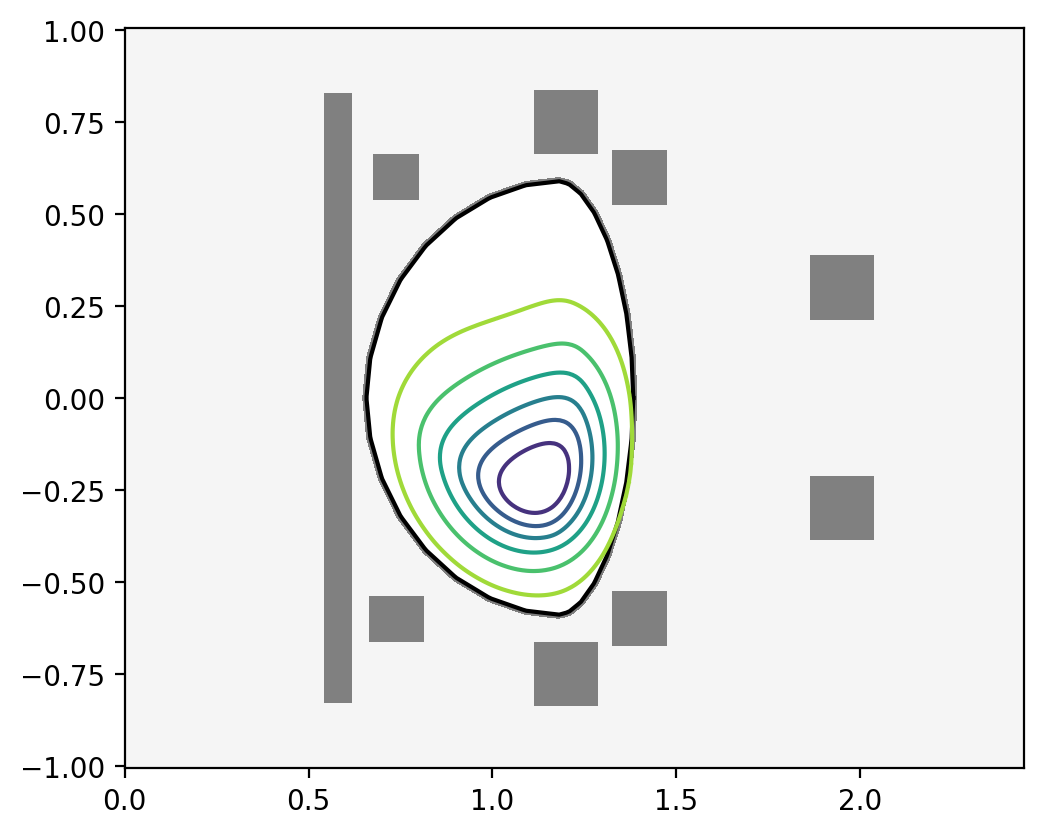

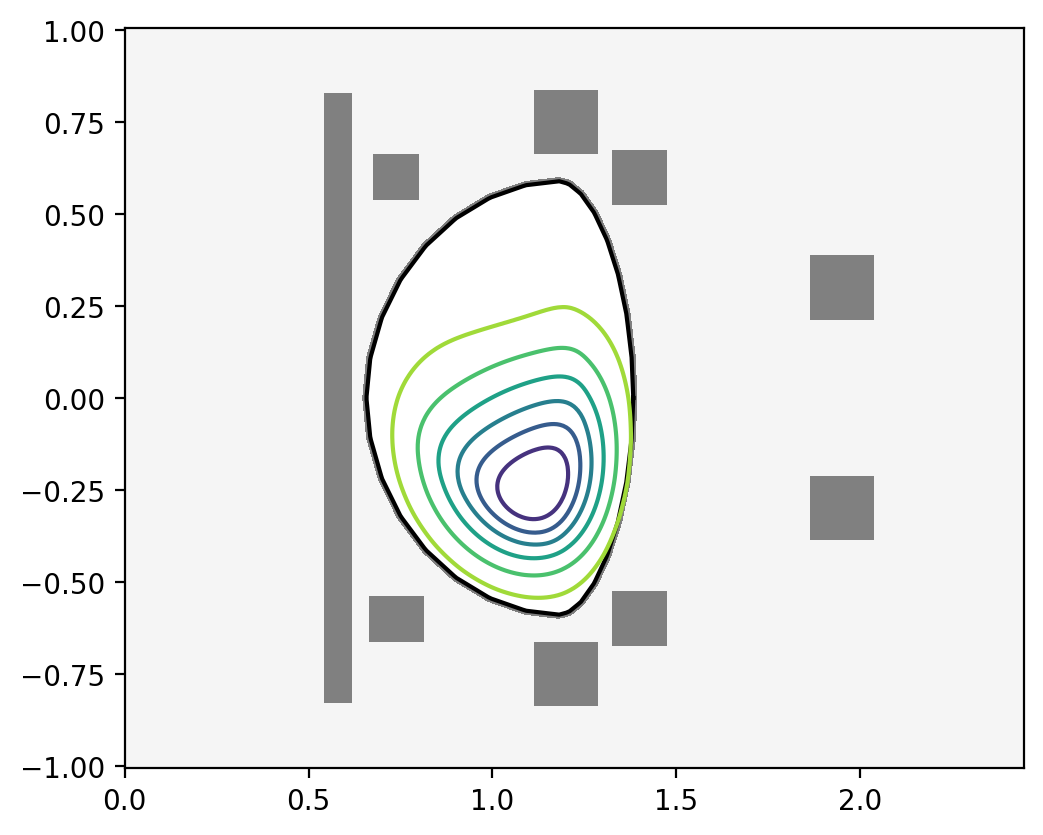

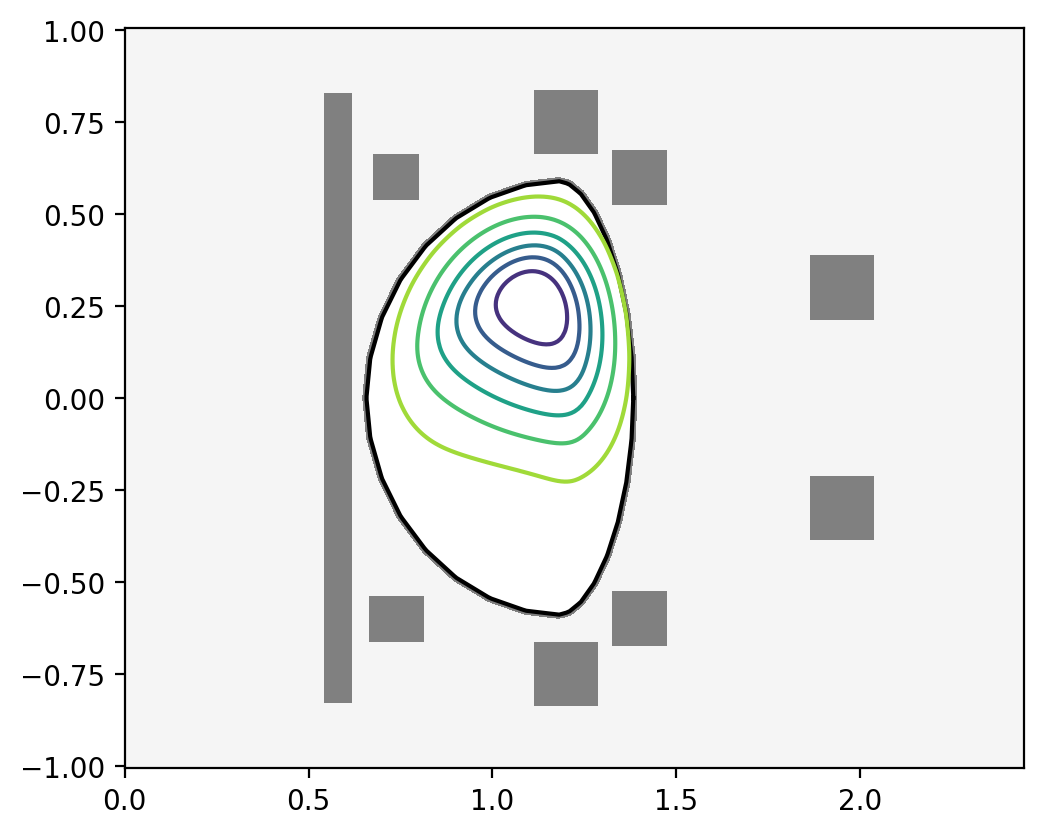

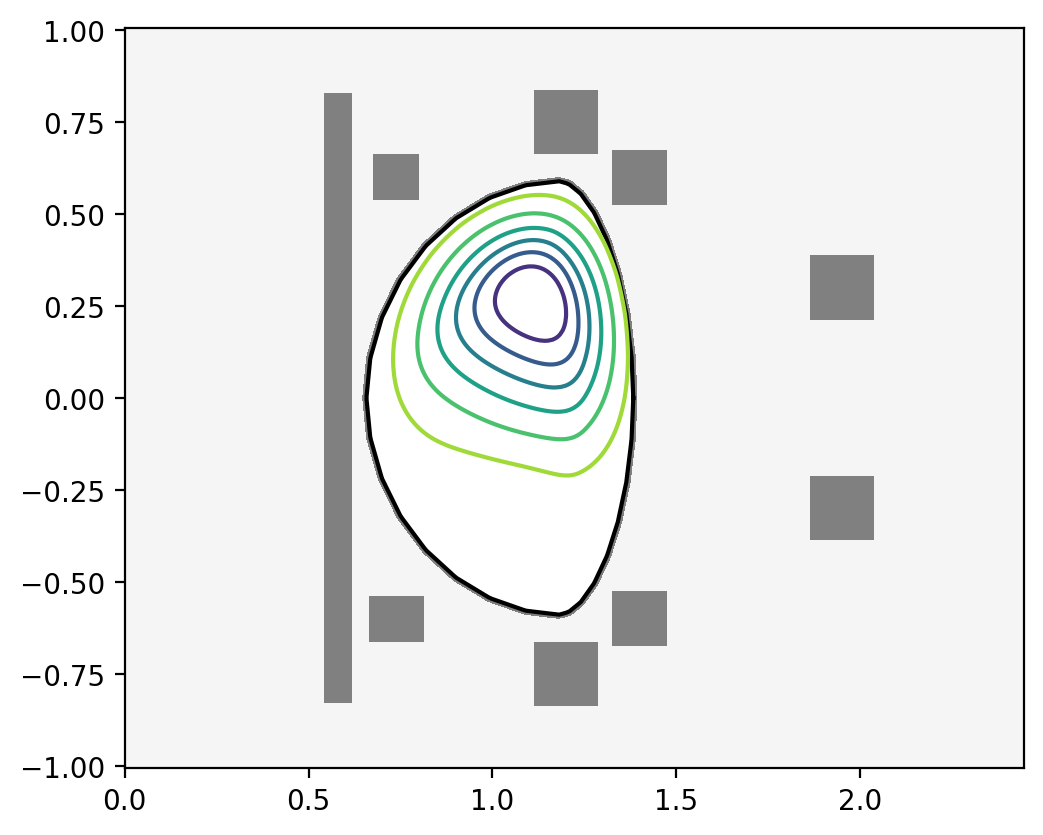

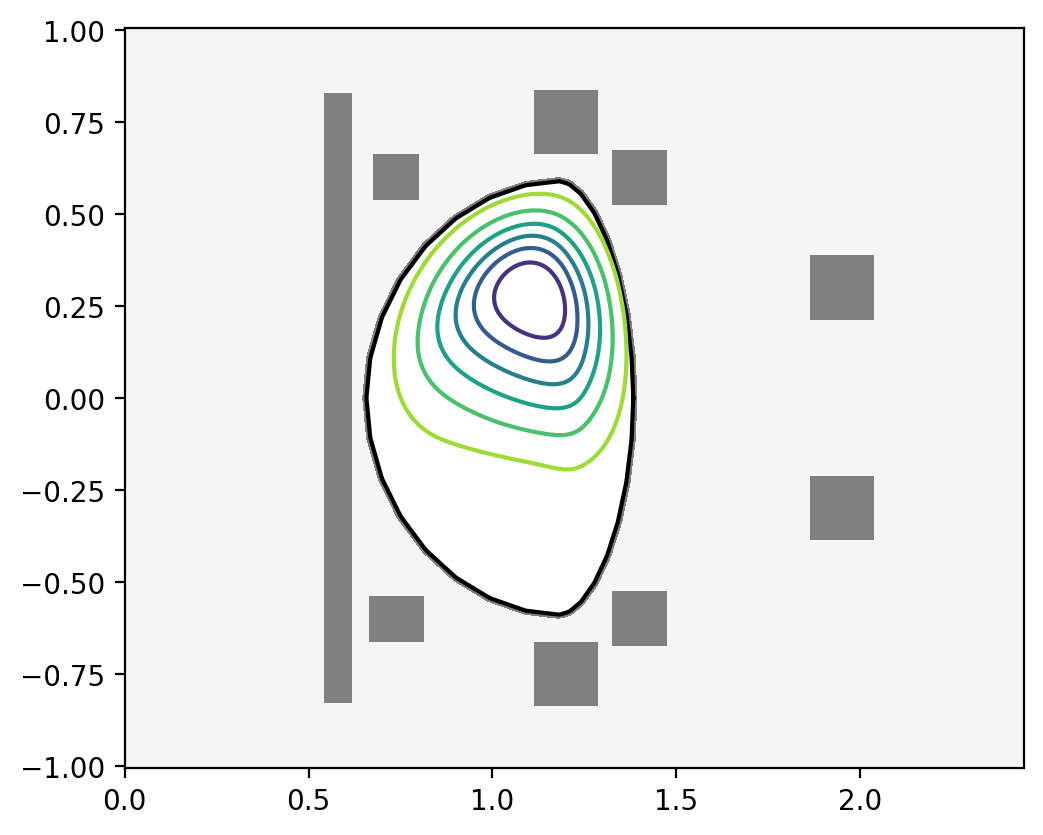

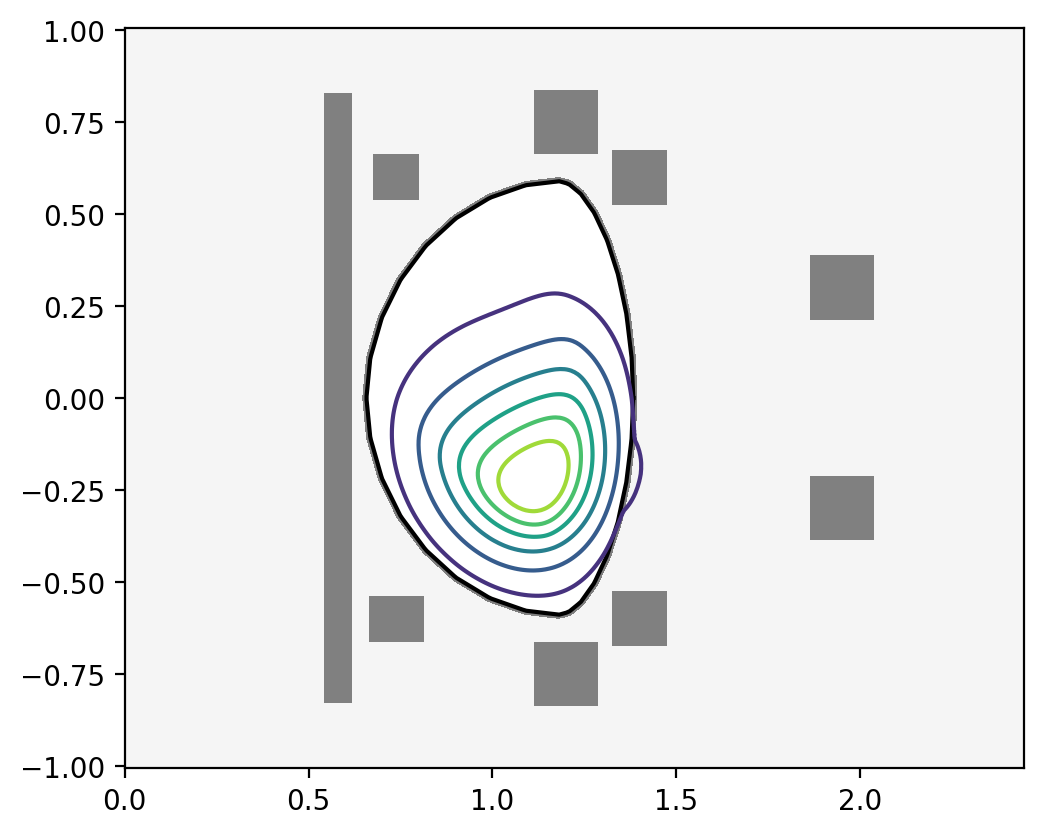

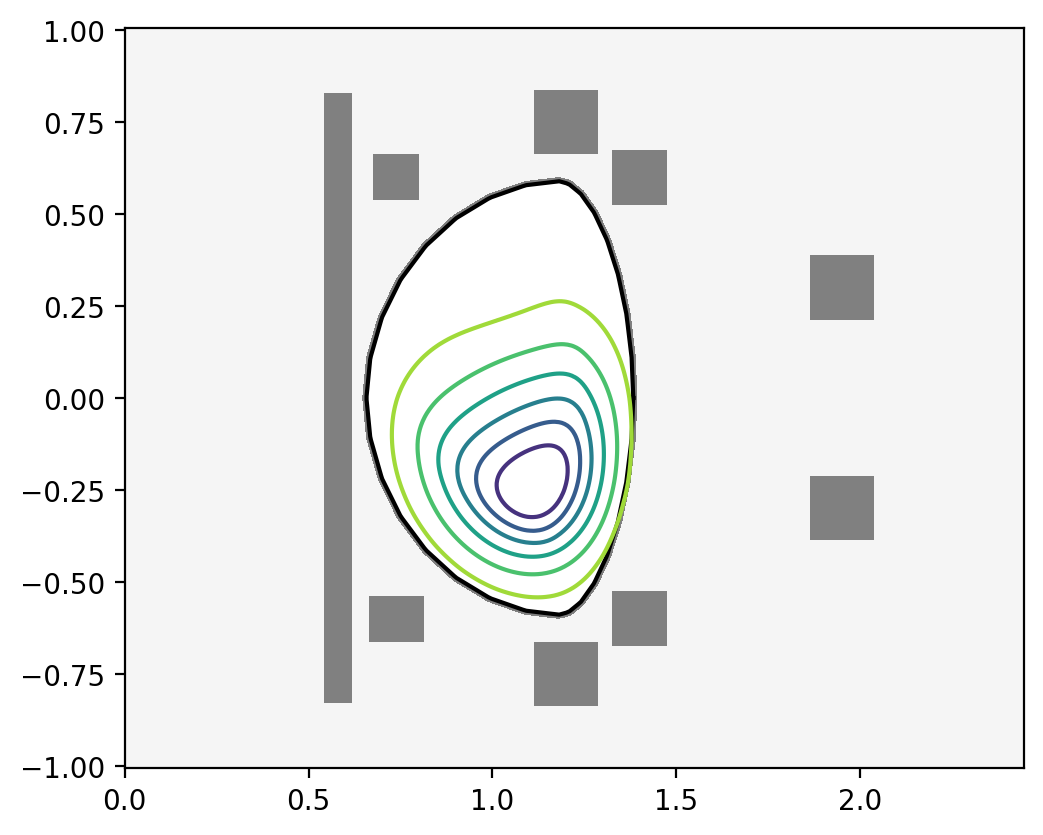

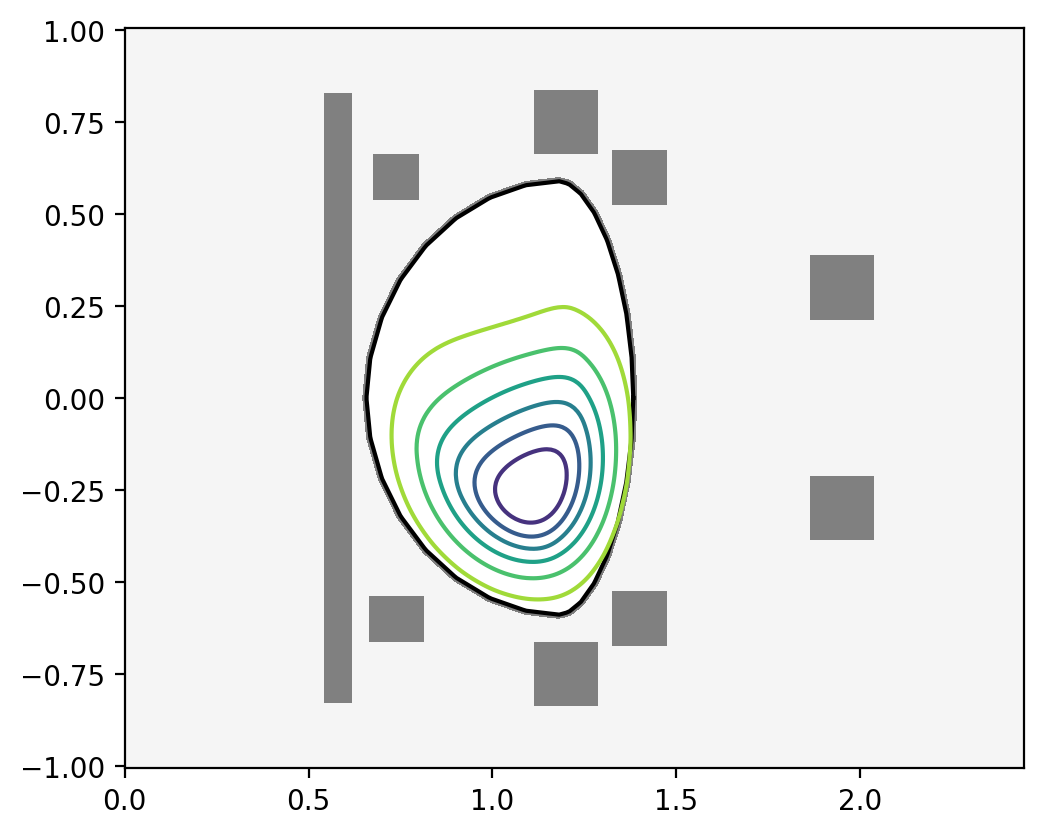

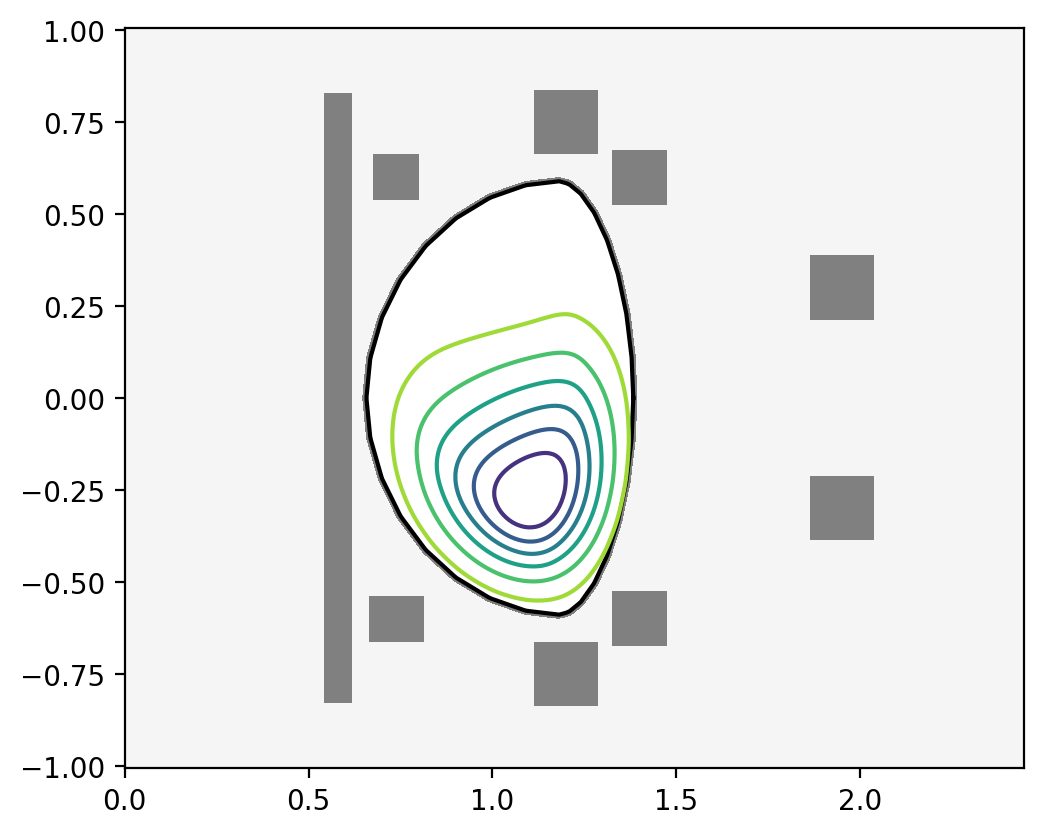

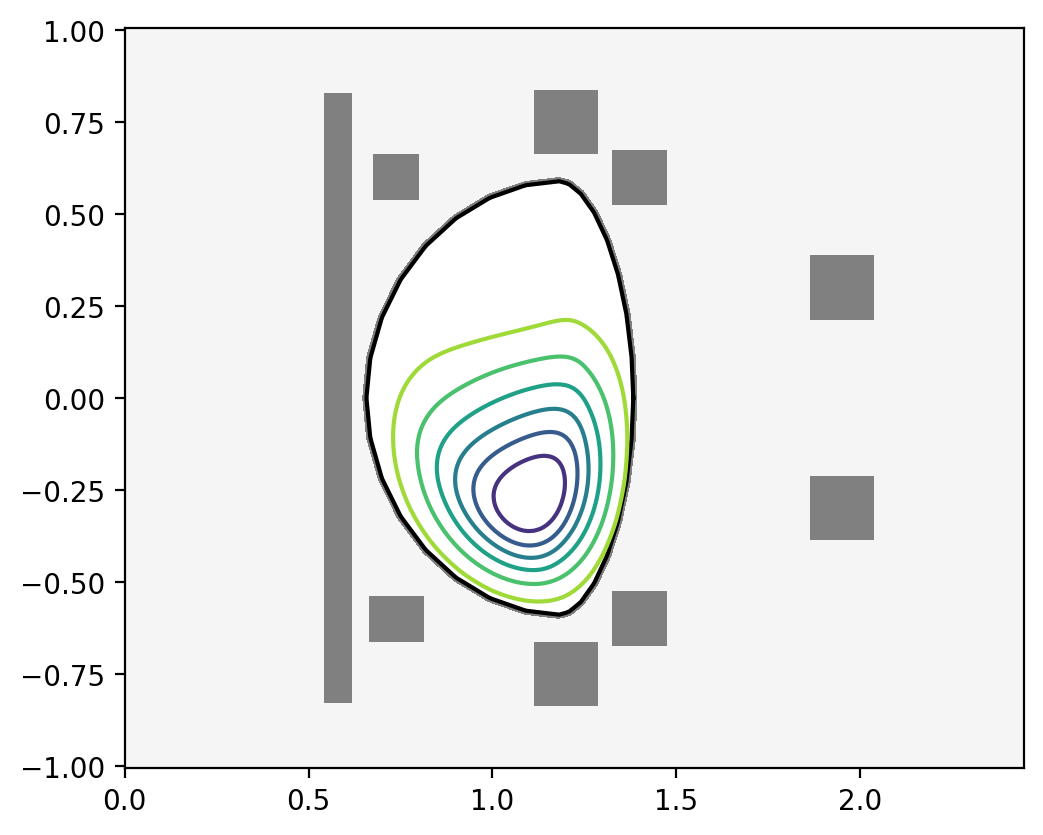

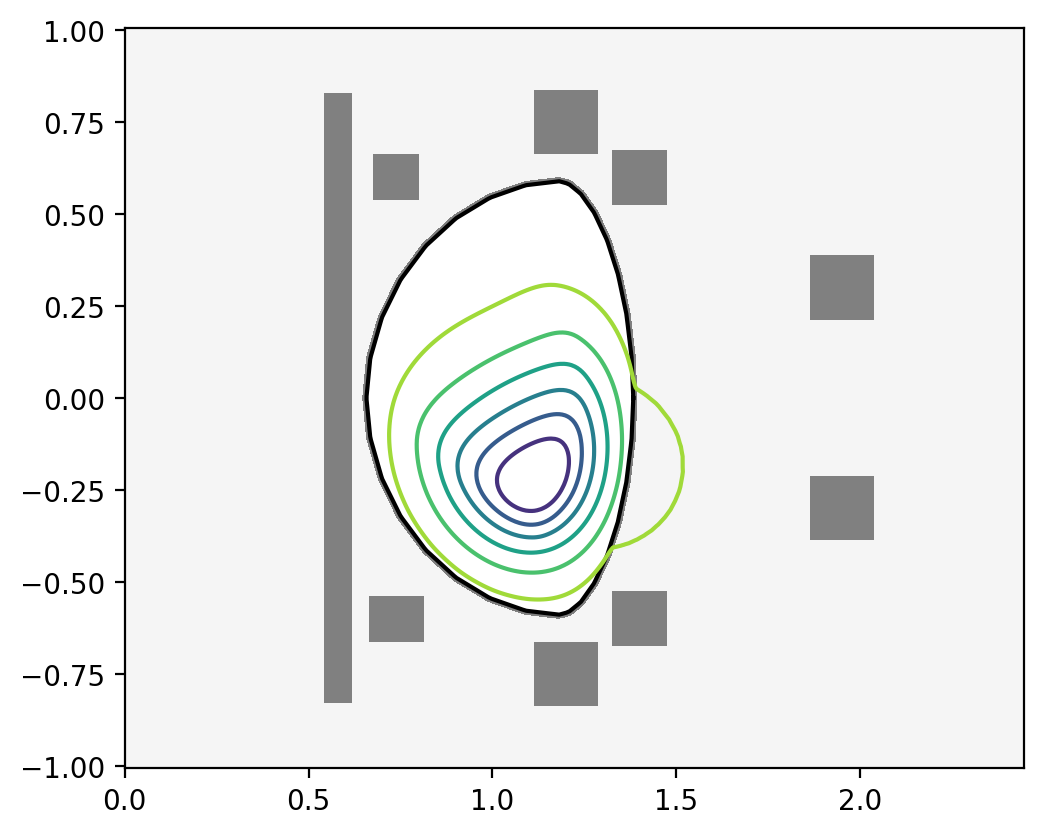

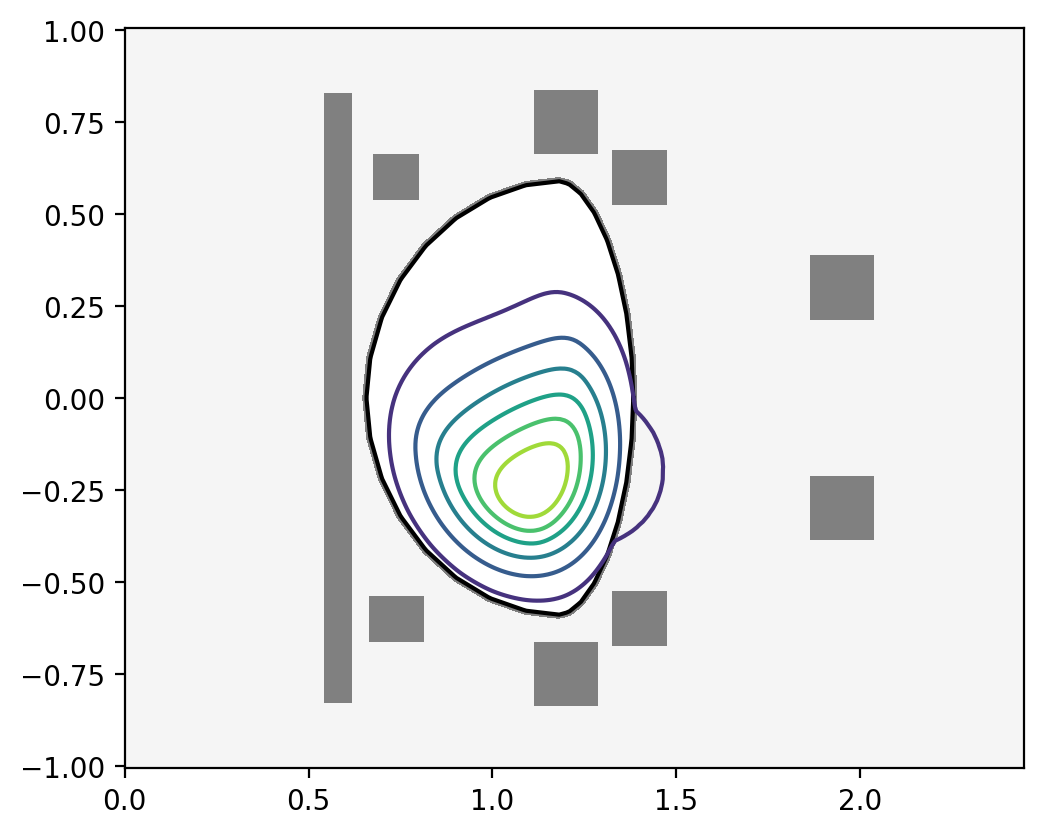

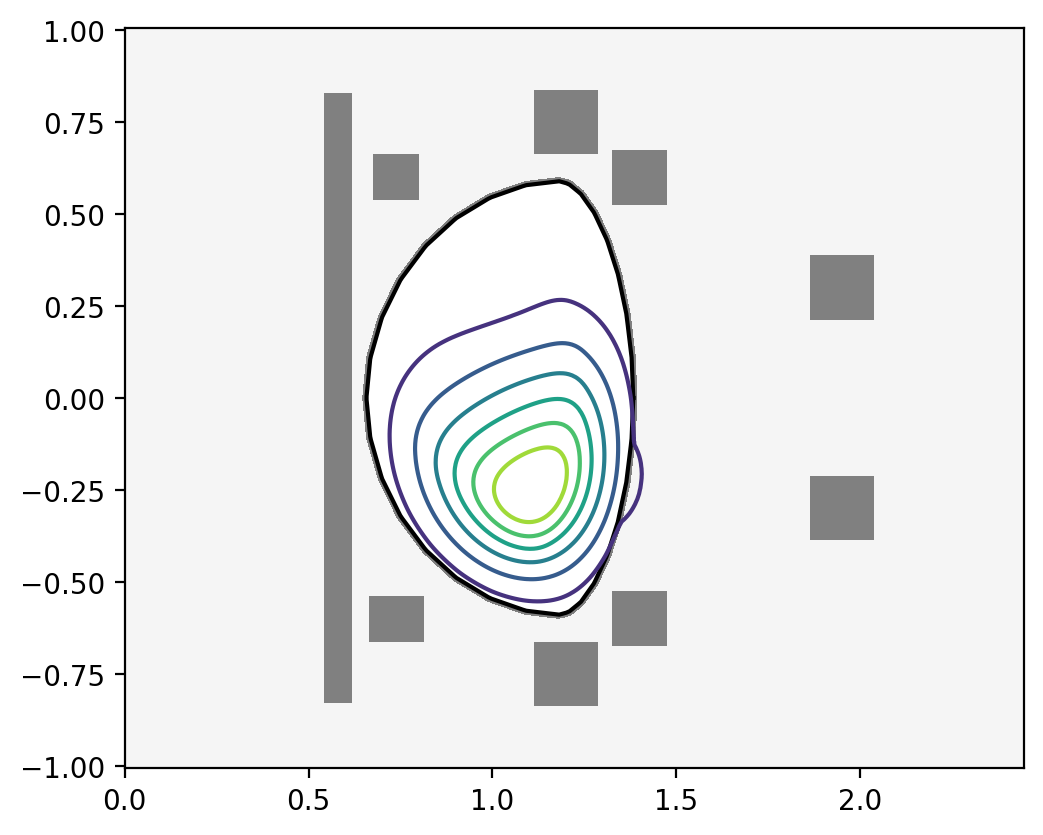

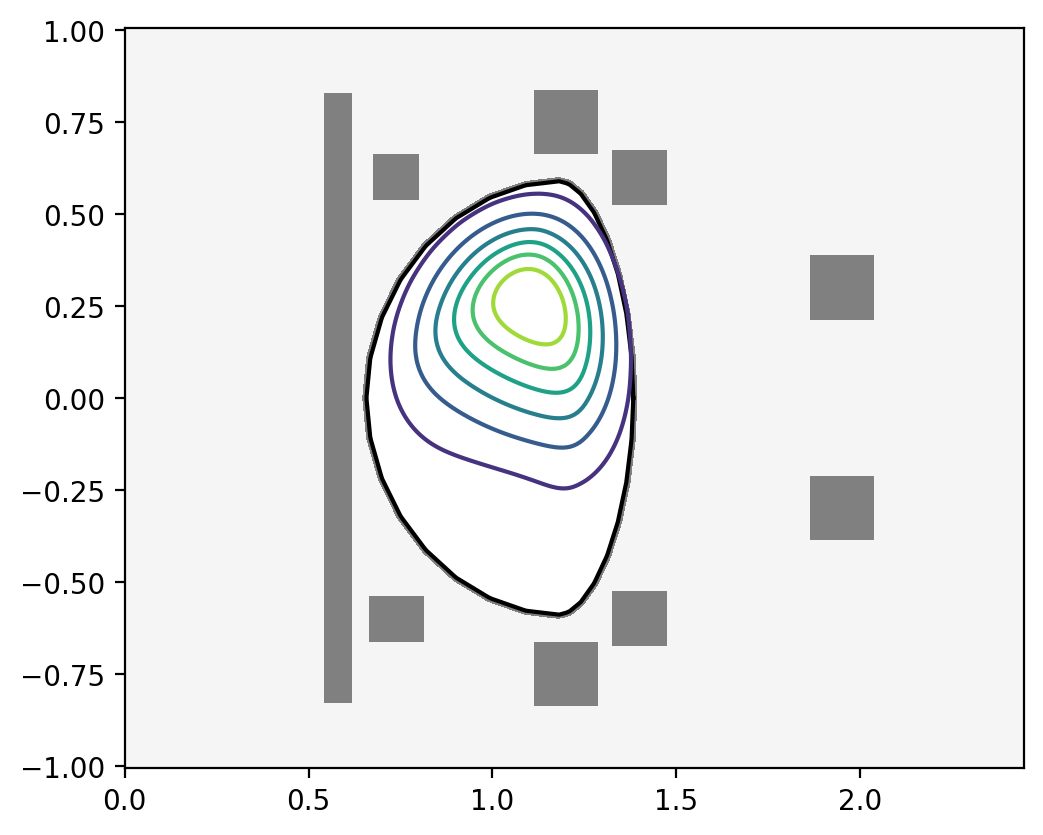

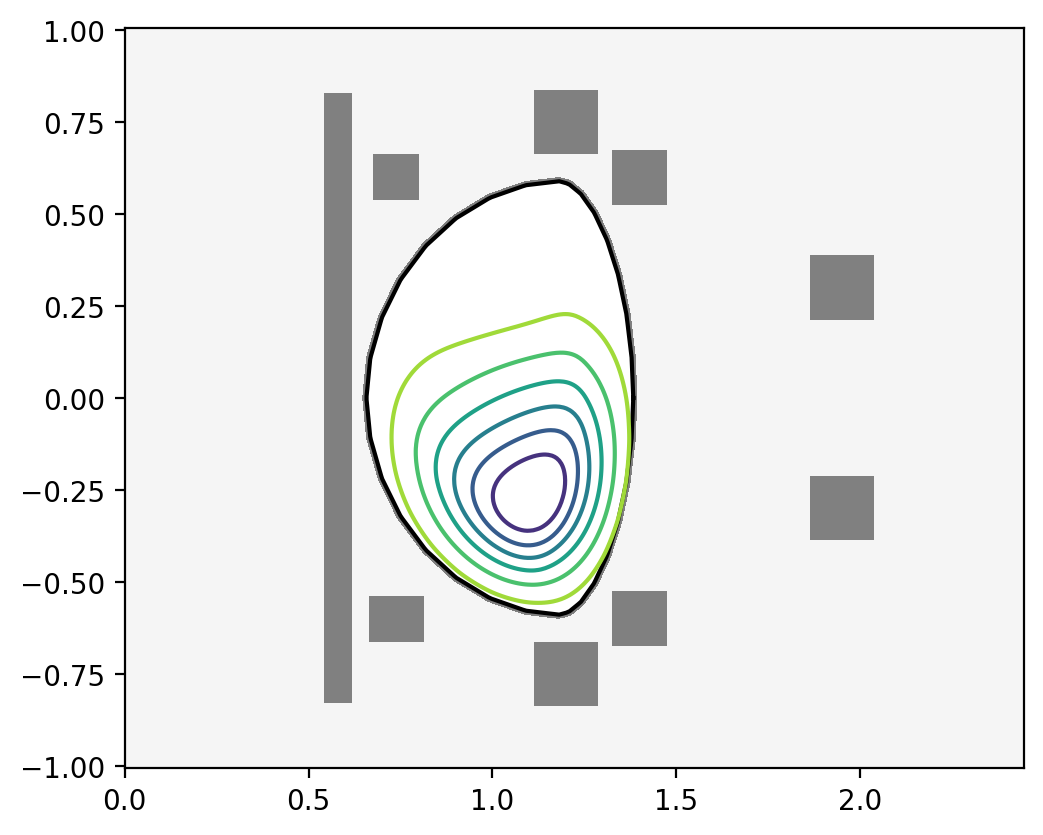

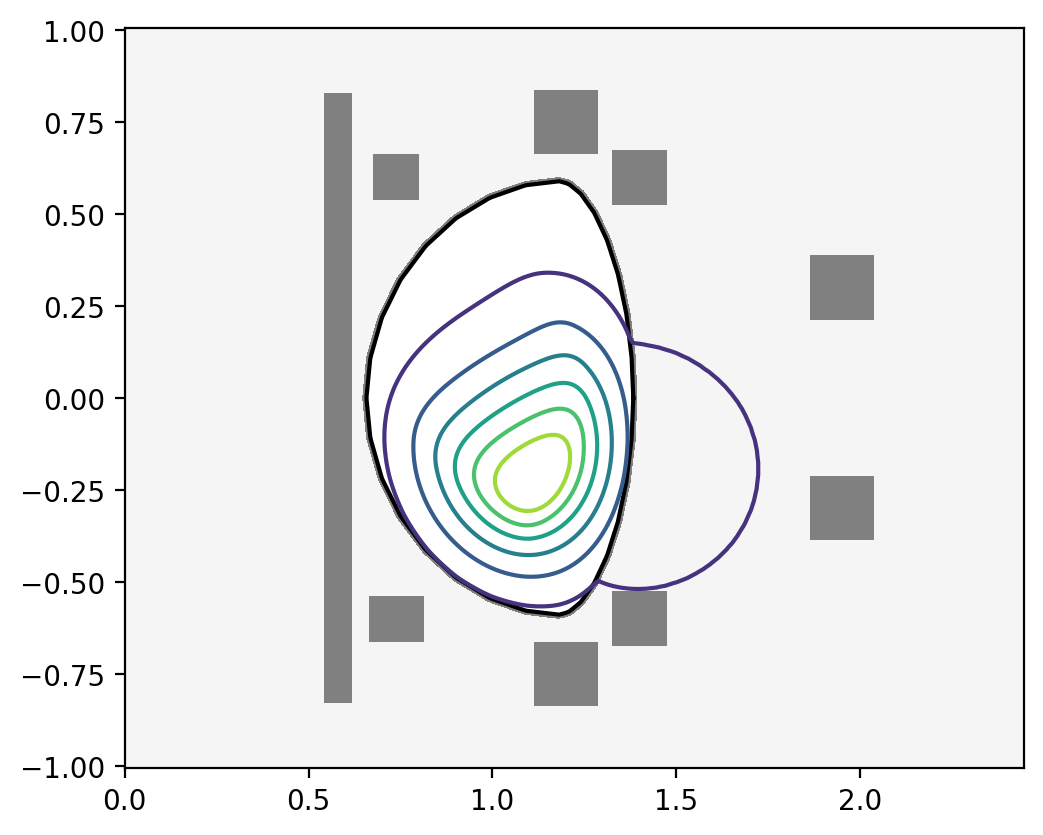

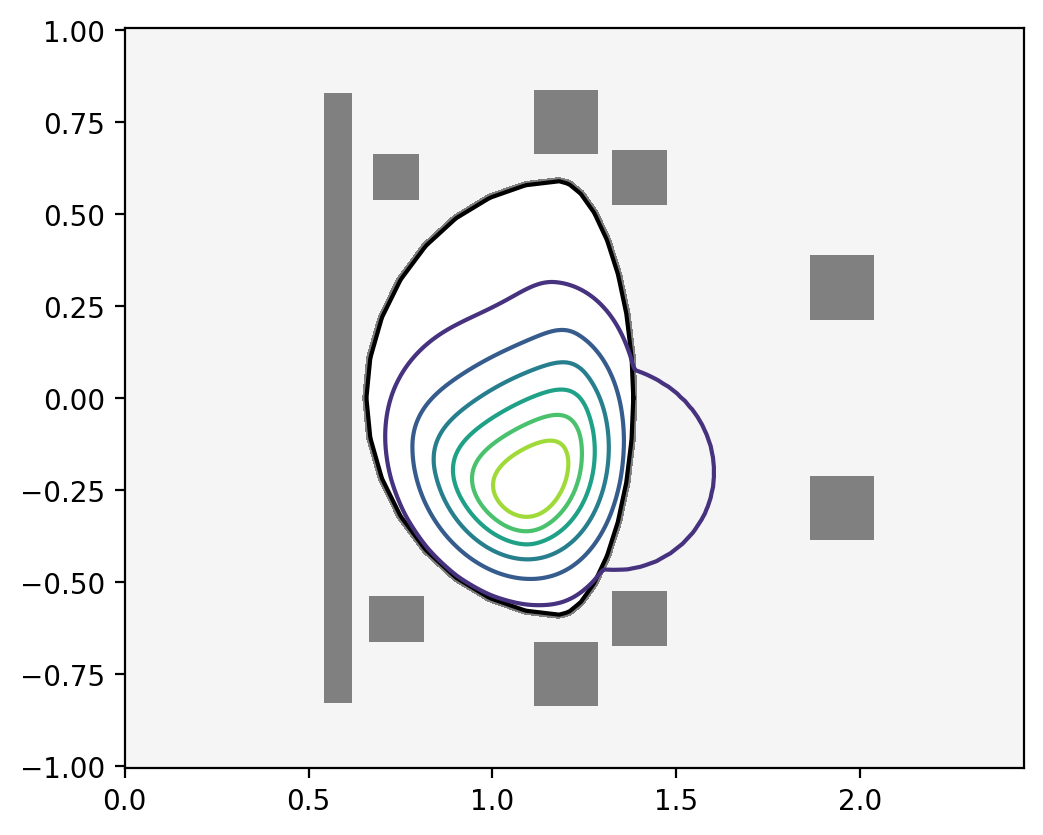

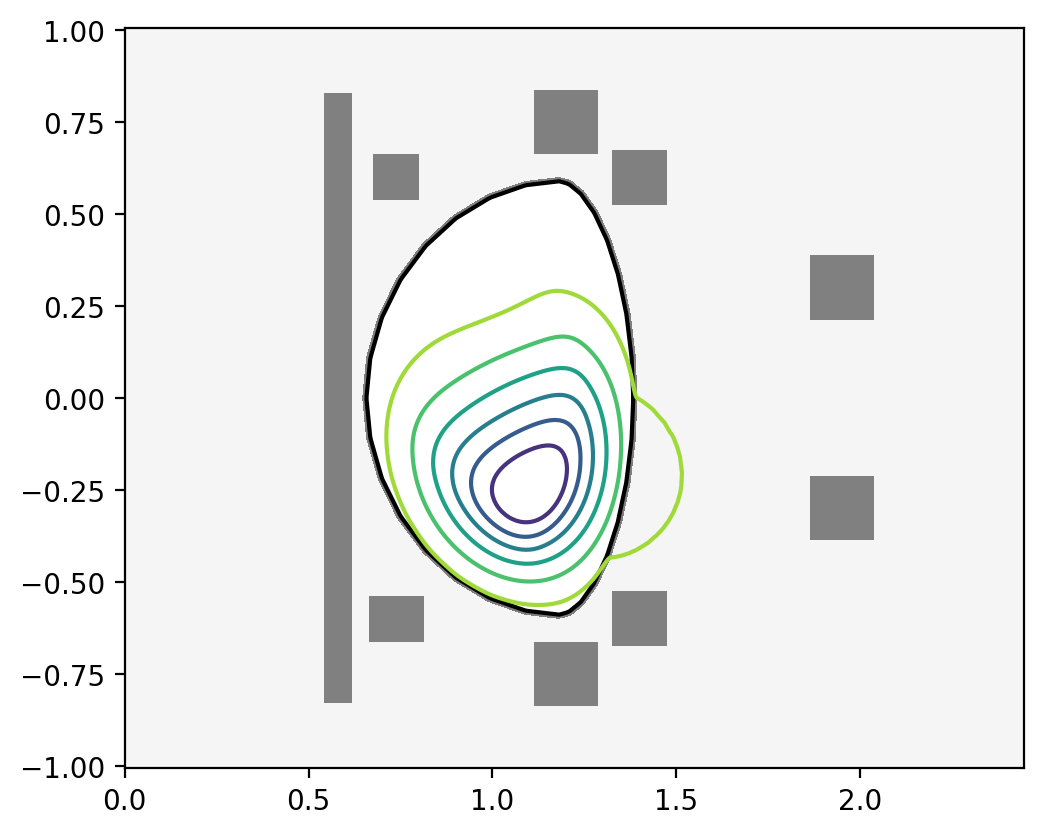

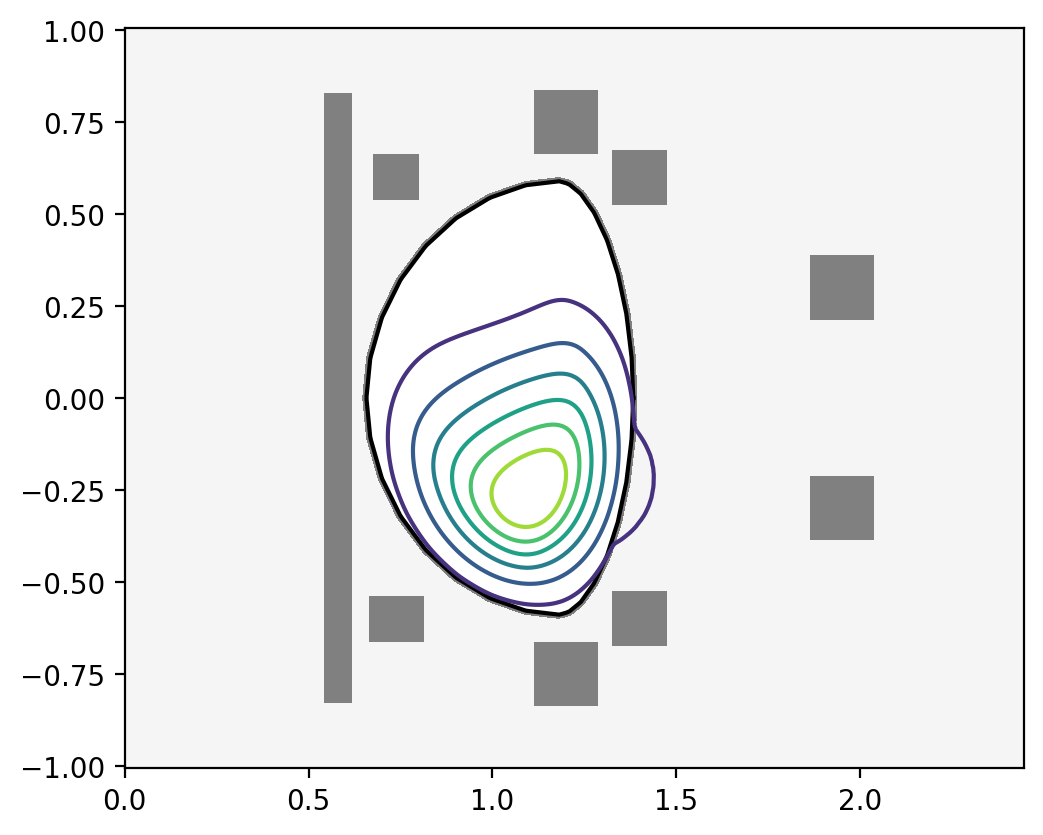

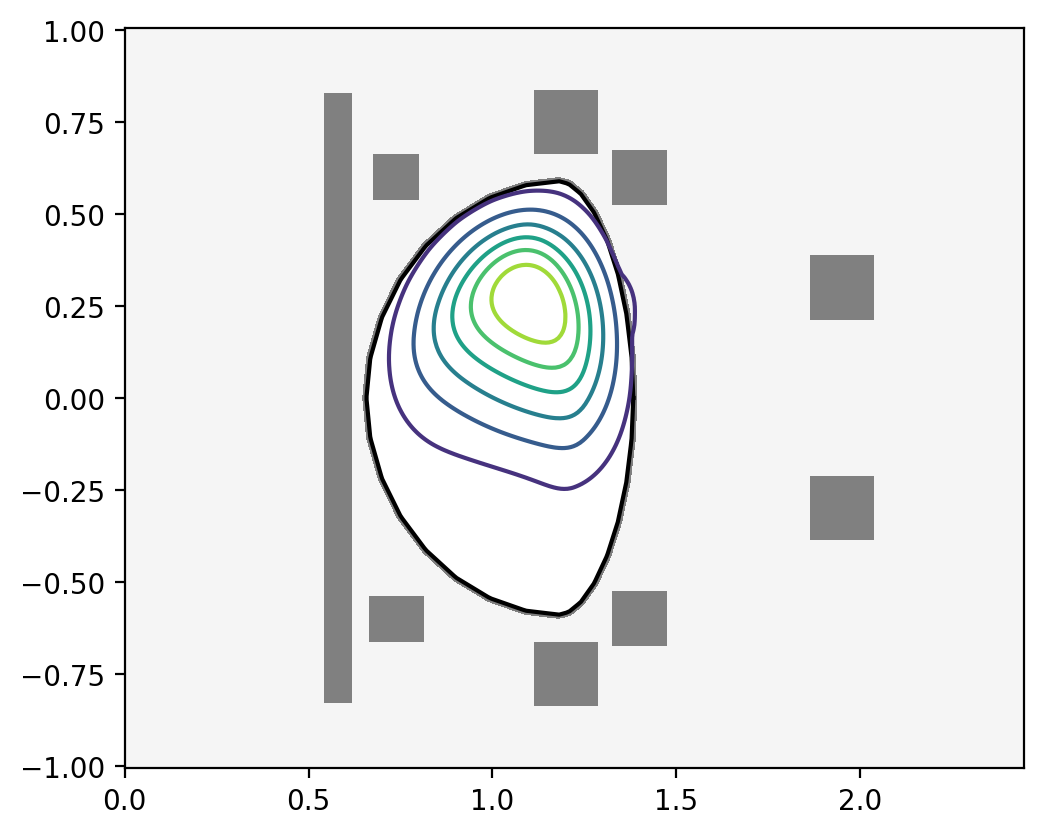

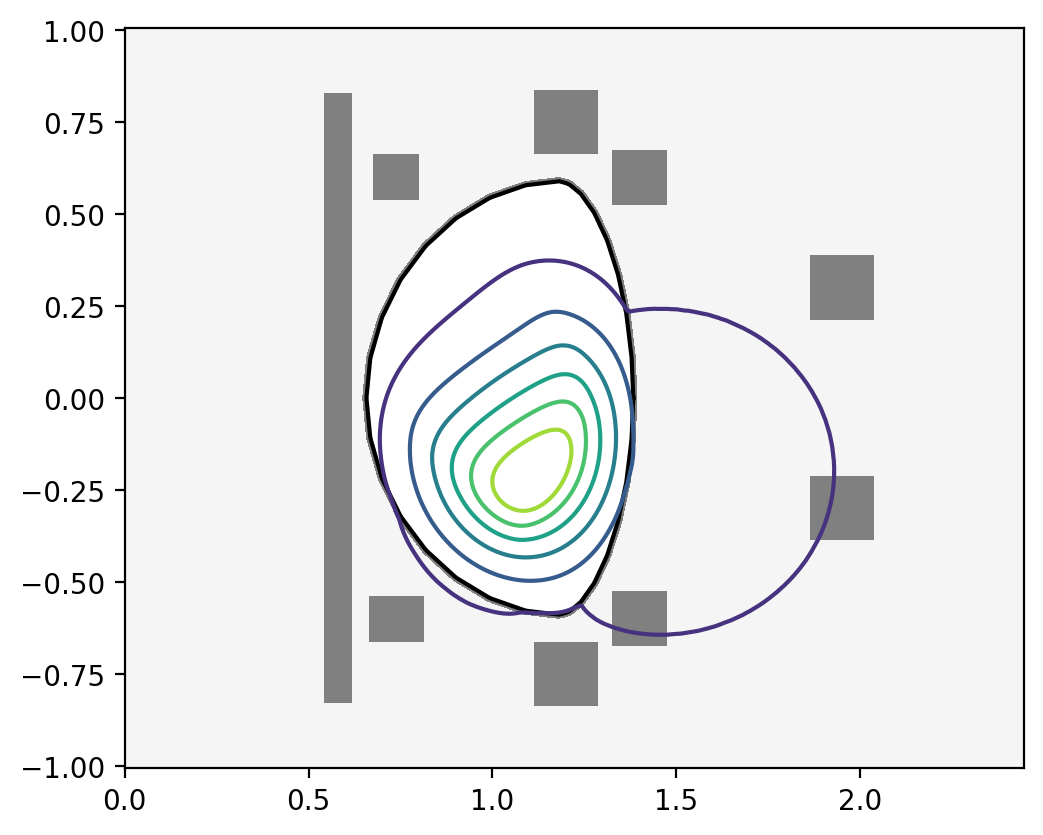

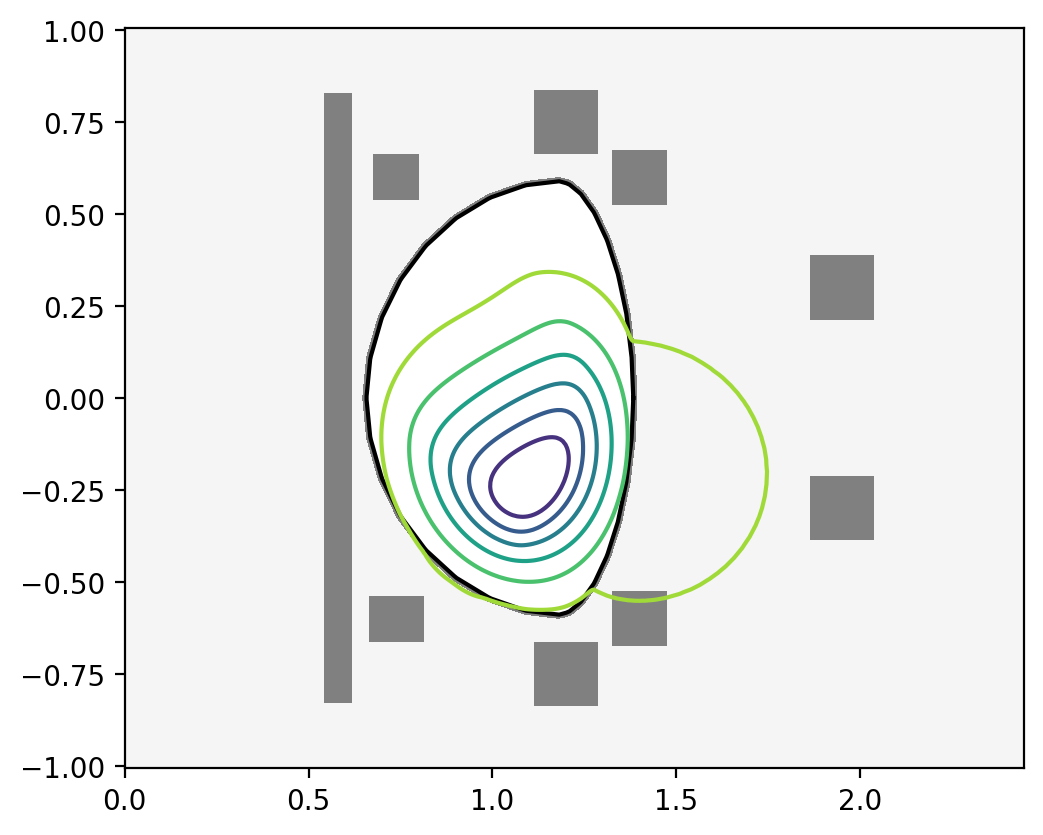

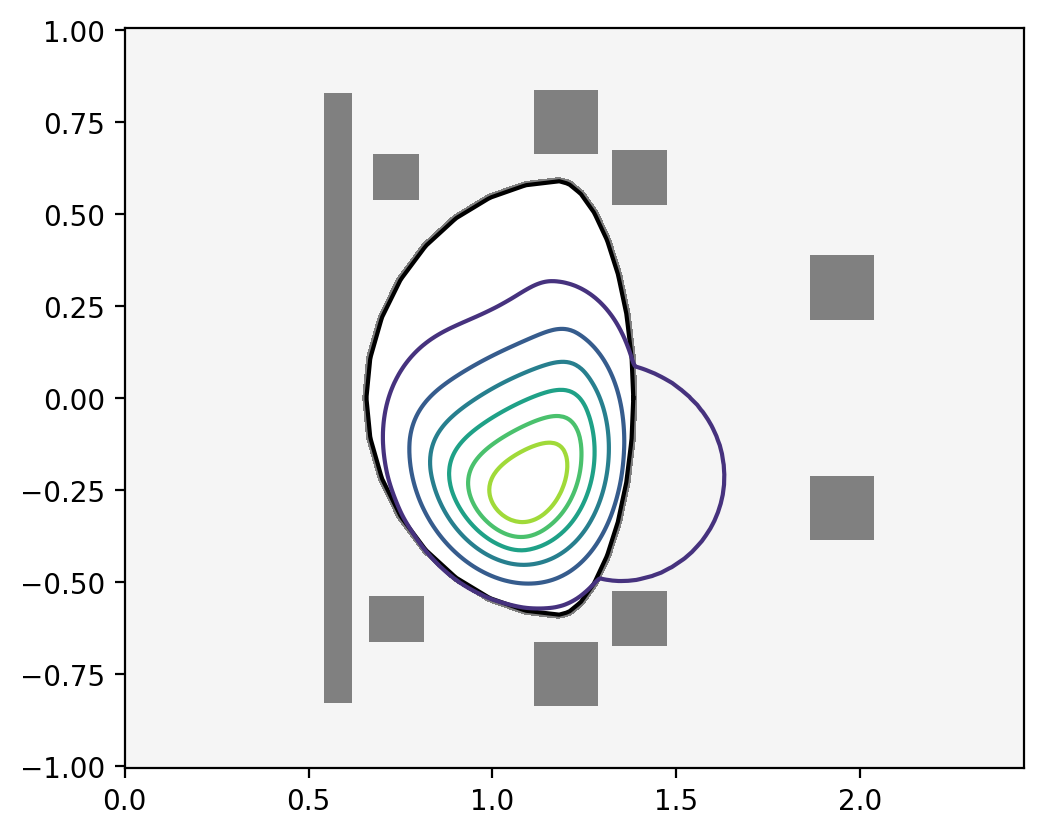

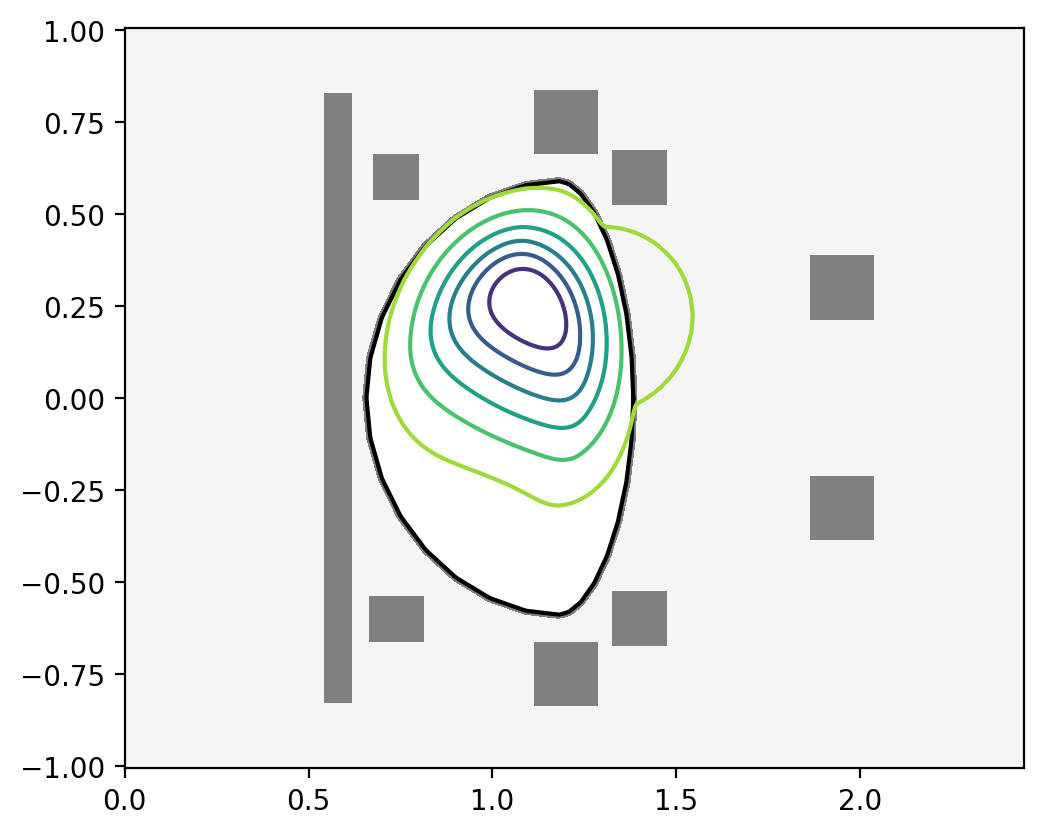

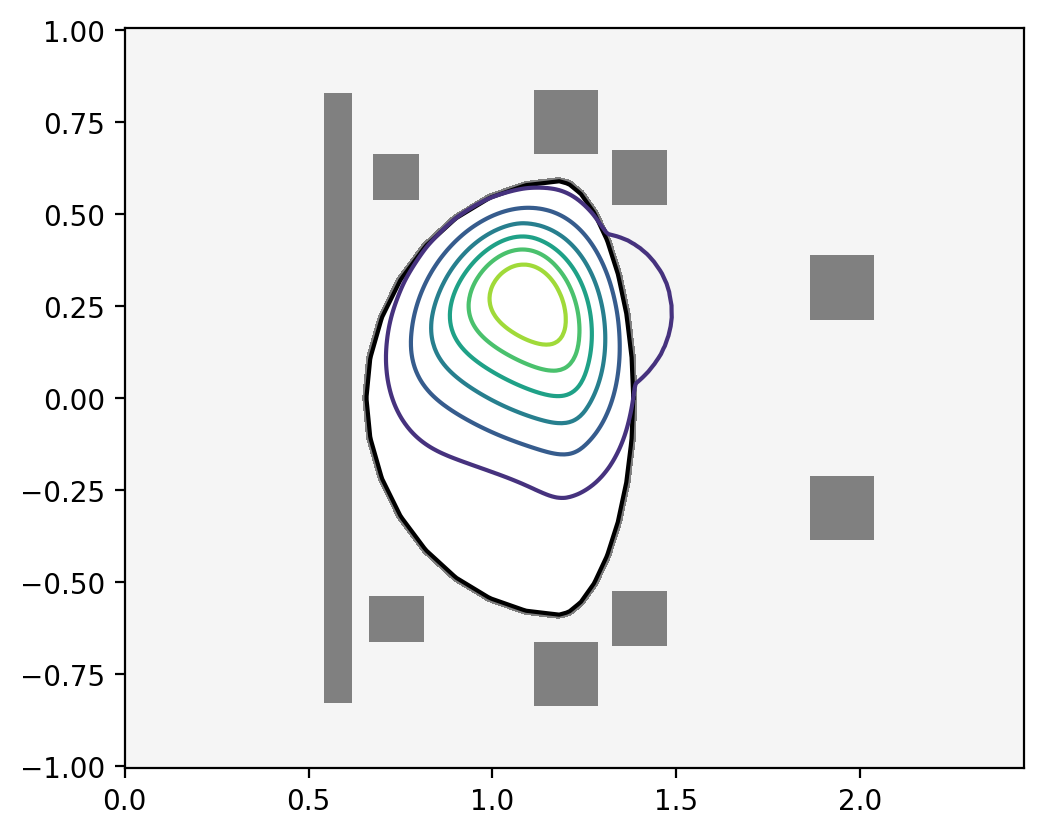

In [9]:
ds = np.linspace(-0.7, -.3, 5)
es = np.linspace(1.5, 1.9, 5)

gammas = []
taus = []
kappas = []
deltas = []
for d in ds:
    for e in es:
        r, z, zeff = boundaryShape(kapu = e, kapl = e, delu = d, dell = d, zetail = 0, zetaiu = 0, zetaou = 0, zetaol = 0, a = 0.2588, eps = 0.2588/1, zoffset = 0, upnull = True, lonull = True, npts = 8)
        boundary = np.column_stack((r,z))
        boundary = np.nan_to_num(boundary)

        x_points = np.zeros((2,2))
        x_points[0,:] = boundary[np.argmin(boundary[:,1]),:]
        x_points[1,:] = boundary[np.argmax(boundary[:,1]),:]
        x_weights = 50*np.ones(2)
        mygs.set_saddles(x_points, x_weights)
        
        isoflux_weights = 50*np.ones(len(boundary))
        mygs.set_isoflux(boundary, isoflux_weights)
        #find equilibrium
        mygs.init_psi(0.68,0,0.2, 1.8,0.3)
        mygs.settings.maxits = 100
        mygs.update_settings()
        mygs.solve()

      

        eig_vals, eig_vecs = mygs.eig_td(-1.E5,10,True) 
        gammas.append(eig_vals[0,0])
        eig_wall, eigvec_wall = mygs.eig_wall()
        tau_w = 1/eig_wall[1][0]
        taus.append(tau_w)

        stats = mygs.get_stats()
        deltas.append(np.min((stats['deltaU'], stats['deltaL'])))
        kappas.append(np.max((stats['kappaU'], stats['kappaL'])))

        fig, ax = plt.subplots()
        mygs.plot_machine(fig,ax)
        mygs.plot_psi(fig,ax,eig_vecs[0,:],normalized=False,xpoint_color=None,opoint_color=None)

In [10]:
print(repr(np.array(gammas)))
#print(taus)

array([-1659.46474372, -1801.8006937 , -2074.67967648, -2333.90016139,
       -2686.75427612, -1473.71438586, -1703.26650071, -1831.40328639,
       -2141.10703547, -2462.73254778, -1098.08367855, -1254.81912405,
       -1470.66899775, -1719.99231042, -2005.8601567 ,  -757.97898844,
        -937.28697962, -1122.15311508, -1346.97308603, -1547.31026681,
        -579.40418269,  -743.12098122,  -901.84712054, -1066.972483  ,
       -1214.38494751])


In [ ]:
print(taus)

[0.017031241125345833, 0.01703124112534576, 0.017031241125345768, 0.01703124112534582, 0.017031241125345837, 0.017031241125345778, 0.017031241125345837, 0.017031241125345802, 0.017031241125345847, 0.0170312411253458, 0.017031241125345795, 0.017031241125345823, 0.017031241125345813, 0.017031241125345823, 0.017031241125345844, 0.0170312411253458, 0.017031241125345944, 0.017031241125345785, 0.017031241125345785, 0.017031241125345556, 0.017031241125345813, 0.017031241125345816, 0.0170312411253458, 0.017031241125345774, 0.017031241125345827]


In [ ]:

gtw = -np.array(gammas)*0.0033128919217321156
print(repr(gtw))


array([1.00427686, 1.15053183, 1.41067778, 1.7639982 , 2.16201551,
       0.92561208, 1.08439377, 1.31408228, 1.57545728, 1.88816747,
       0.74318259, 0.89281246, 1.09503528, 1.34645475, 1.64350534,
       0.57314108, 0.71673845, 0.90077766, 1.1183936 , 1.38162961,
       0.44219215, 0.57688382, 0.74169712, 0.94202629, 1.13544563])
